### **정상성 (定常性, Stationarity)**
- 일정해서 늘 한결같은 성질을 뜻한다.
- 관측된 시간에 무관하게 과거, 현재, 미래의 분포가 같아야 한다.
- 평균, 분산 등이 변하지 않으며 추세나 계절성이 없는 시계열 데이터이다.
- 하지만, 정상성을 나타내는 시계열은 장기적으로 볼 때 예측할 수 있는 패턴을 나타내지 않아야 한다. 즉, 불규칙 해야한다.
- 즉, 어떤 특정한 주기로 반복하는 계절성이나 위로, 아래로 가능 추세성이 없어야 한다.

<img src="./images/stationary.png"> 

In [1]:
# 쇼크, 바이어스에도 민감하지 않게 정상성을 부여한 다음 예측

### **라그 (Lag)**
- 라그(시차)는 현재 시점에서 이전 시점의 값을 의미하며, 특정 시점 t에서의 라그는 t-k에서의 값을 가리킨다.
- 시계열 데이터에서 패턴과 트렌드를 분석하고 예측하는데 중요한 개념이다.
- 예를 들어, 하루 전의 주식 가격을 이용하여 다음 날의 주식 가격을 예측하는 등의 분석에 사용될 수 있다.

In [2]:
# t에서 t-1의 값을 가리키는걸 라그(시차)라고 한다.
# 하루 전, 일년 전 단위가 각 다르므로 `라그`라는 단어로 통일
# 라그를 어떻게 설정하느냐에 따라 패턴과 추세를 볼 수 있고 이로 예측할 수 있다.

### **차분 (Differencing)**
- 연이은 관측값들의 차이를 계산해준다.
- 시계열 데이터의 평균과 분산이 일정해야 시계열 값을 예측할 수 있다.
- 정상성을 나타내지 않는 시계열에서 정상성을 나타내도록 만드는 방법 중 대표적인 방법이다.
- (효과) 차분을 통해 추세나 계절성을 제거하거나 감소시킬 수 있다.
- 라그를 사용하여 시계열 데이터를 분석할 때, 라그된 데이터 사이의 차이를 계산하여 차분을 수행한다.

In [3]:
# 정상성이 없는 시계열 데이터에 차분을 사용하여 정상성을 나타내도록 만들 수 있다.
# ex) 30 에서 1라그를 줘서 20이 나온다면 차분을 구하면 10
# 차분을 할 수록 안정적이게 된다. (추세나 계절성은 사라지지만 패턴을 볼 수 있다)

### **자기상관 함수(Autocorrelation Function, ACF)**
- 자기상관이란, 현재 시점에서 이전 시점 간의 관련성을 뜻한다.
- 시간 흐름에 따라 각 데이터는 독립적이지 않다. 전일 데이터가 금일 데이터에 영향을 주고, 익일 데이터는 금일 데이터의 영향을 받는다.
- 시계열의 라그 사이의 선형 관계를 측정해서 시계열 자료의 정상성을 파악할 때 사용한다.
- ACF 그래프는 정상 시계열일 경우 모든 시차에서 0에 근접한 모양을 나타내고,  
  비정상 시계열(차분하기 전)은 천천히 감소할 경우 추세, 물결 모양일 경우 계절이다.

<img src='./images/acf.jpg'>

### **부분자기상관 함수 (Partial ACF, PACF)**
- 다른 시차의 영향을 제거한 후에 나타나는 자기상관을 보여준다.
- 해당 시점과 주어진 시차 사이의 관계를 확인할 때, 중간에 있는 시차들의 영향을 배제한다. (ACF와 차이점)
- 현재 시점을 기준으로 lag를 설정하면, 전날과의 차이를 계속 구해나가는 것이 아니라 전전날, 전전전날 등 부분적으로 영향을 주는 시차를 확인할 수 있다.
- 이 때, 다른 시차의 영향을 제거하고 해당 시차와의 상관관계만 측정한다.
- PACF를 통해 데이터의 직접적인 상관관계를 파악하는 것은 유용하지만, 정상 시계열과 비정상 시계열을 구분하는데에 활용하기 어렵다.

### **ACF와 PACF**

1. ACF
> <img src='./images/acf.png'>
> 
> - 시차에 대한 항들이 누적된다.
> - 현재 시점으로부터 정확히 이전 lag와의 상관관계를 측정하는 것이다.
> - 시계열 데이터의 전반적인 패턴을 파악해서 추세나 주기성 등 다양한 특성을 확인할 수 있다.
> - 차분을 통해 정상 시계열로 변환한 뒤 ACF를 구하면, 정상정을 가진 시계열에서의 자기상관을 파악할 수 있다.  
> `온라인 판매 플랫폼에서 전날 방문자 수와 현재 방문자 수 간의 자기 상관관계를 확인함으로써, 마케팅 활동이나 프로모션 등의 변화가 방문자 수에 미치는 영향을 이해할 수 있게 된다.`

2. PACF
> <img src='./images/pacf.png'>
>
> - 특정 시차의 영향을 반복적으로 제거한다.
> - 이전 lag와의 상관관계뿐만 아니라 훨씬 이전의 시차와의 상관관계도 측정할 수 있다.
> - 직접적인 상관관계를 파악하는데 유용하고, 특정 시차에 대한 자기상관을 직접적으로 보여준다.
> - 이를 통해 어떤 시점이 다른 시점에 미치는가에 대한 영향력을 파악하는데 용이하다.
> - 이미 정상성을 가진 데이터라면, 차분없이 PACF를 사용하여 직접 적인 상관관계를 파악하는 것이 더 효율적일 수 있다.  
> `주식 시장에서 주가 예측 모델을 구축하는 경우, 특정 시점의 주가와 한 달전의 주가 간의 직접적인 상관관계를 확인함으로써 한 달전의 주가 변동이 현재 주가에 미치는 영향을 파악할 수 있게 된다.`

In [ ]:
# ACF: 누적 (전체적인 패턴, 추세를 확인할 수 있다 = 비정상, 정상 구분 가능) 무조건 라그가 1
# PACF: 단독(독립) (중간 과정을 모르기때문에 비정상도 정상처럼 생김) 라그를 했을 때 직접적인 연관관계를 보고싶을때 사용.

In [4]:
import yfinance as yf

google_stock_df = yf.download('GOOG', start='2014-05-01')
google_stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,26.283339,26.573542,26.122280,26.494759,26.494759,38110345
2014-05-02,26.614929,26.626896,26.208544,26.324226,26.324226,33770463
2014-05-05,26.169153,26.372595,25.994633,26.318243,26.318243,20482080
2014-05-06,26.189596,26.268379,25.682489,25.686478,25.686478,33780490
2014-05-07,25.718889,25.763268,25.096100,25.428186,25.428186,64486563
...,...,...,...,...,...,...
2024-06-04,174.449997,175.190002,173.220001,175.130005,175.130005,14066600
2024-06-05,176.535004,177.970001,175.289993,177.070007,177.070007,15233900
2024-06-06,177.429993,178.710007,177.210007,178.350006,178.350006,14255800


In [5]:
# Adj Close : 종가

In [6]:
# 단변량
google_stock_df = google_stock_df['Adj Close']
google_stock_df

Date
2014-05-01     26.494759
2014-05-02     26.324226
2014-05-05     26.318243
2014-05-06     25.686478
2014-05-07     25.428186
                 ...    
2024-06-04    175.130005
2024-06-05    177.070007
2024-06-06    178.350006
2024-06-07    175.949997
2024-06-10    176.630005
Name: Adj Close, Length: 2545, dtype: float64

In [7]:
# 연이은 관측값들의 차이를 계산한다(변화량)
google_stock_df.diff()

Date
2014-05-01         NaN
2014-05-02   -0.170532
2014-05-05   -0.005983
2014-05-06   -0.631765
2014-05-07   -0.258291
                ...   
2024-06-04    0.710007
2024-06-05    1.940002
2024-06-06    1.279999
2024-06-07   -2.400009
2024-06-10    0.680008
Name: Adj Close, Length: 2545, dtype: float64

In [8]:
# 연이은 관측값들의 차이를 비율로 계산한다(변화율)
google_stock_df.pct_change()

Date
2014-05-01         NaN
2014-05-02   -0.006436
2014-05-05   -0.000227
2014-05-06   -0.024005
2014-05-07   -0.010056
                ...   
2024-06-04    0.004071
2024-06-05    0.011077
2024-06-06    0.007229
2024-06-07   -0.013457
2024-06-10    0.003865
Name: Adj Close, Length: 2545, dtype: float64

Text(0.5, 1.0, 'Google stock differdncing percent of price(2014~2024)')

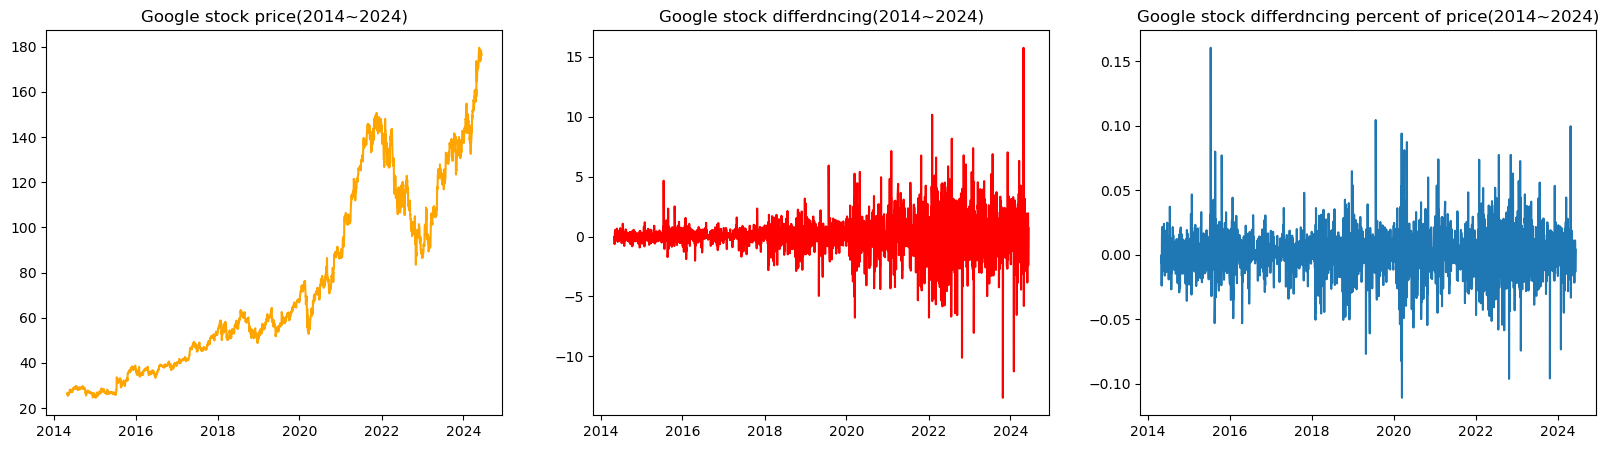

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# 원본데이터
plt.subplot(1, 3, 1)
plt.plot(google_stock_df, c='orange')
plt.title('Google stock price(2014~2024)')

# 변화량
plt.subplot(1, 3, 2)
plt.plot(google_stock_df.diff(), c='red')
plt.title('Google stock differdncing(2014~2024)')

# 변화율
plt.subplot(1, 3, 3)
plt.plot(google_stock_df.pct_change())
plt.title('Google stock differdncing percent of price(2014~2024)')

In [ ]:
# t시점과 t-1시점간의 상관관계 = acf (자기상관함수)

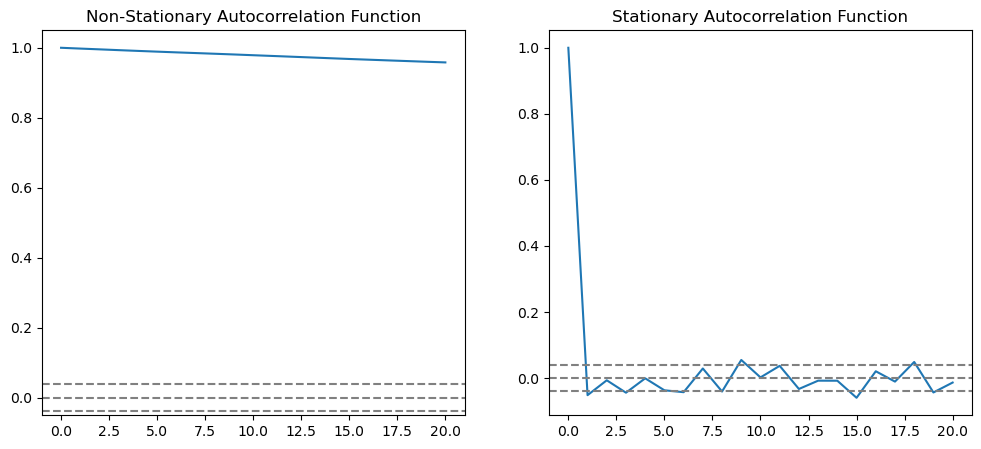

In [14]:
import numpy as np
from statsmodels.tsa.stattools import acf

google_stock_df.dropna(inplace=True)
google_stock_diff_df = google_stock_df.diff().dropna()

plt.figure(figsize=(12, 5))

# x축의 최대값을 nlags를 적는다.

# 원본
google_stock_acf = acf(google_stock_df, nlags=20)
# 차분
google_stock_diff_acf = acf(google_stock_diff_df, nlags=20)

plt.subplot(121)
plt.plot(google_stock_acf)
# 정규분포 영역 안에 드는지 보기 위해  0 +-로 세줄을 그어 영역을 표시
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_df)), linestyle='--', color='gray')
plt.title('Non-Stationary Autocorrelation Function')

plt.subplot(1, 2, 2)
plt.plot(google_stock_diff_acf)
# 정규분포 영역 안에 드는지 보기 위해 0 +-로 세줄을 그어 영역을 표시
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(google_stock_diff_df)), linestyle='--', color='gray')
plt.title('Stationary Autocorrelation Function')

plt.show()

In [ ]:
# 왼쪽보다 오른쪽을 자기상관을 더 잘 볼 수 있다
# 저 범위릘 벗어나면 이상치

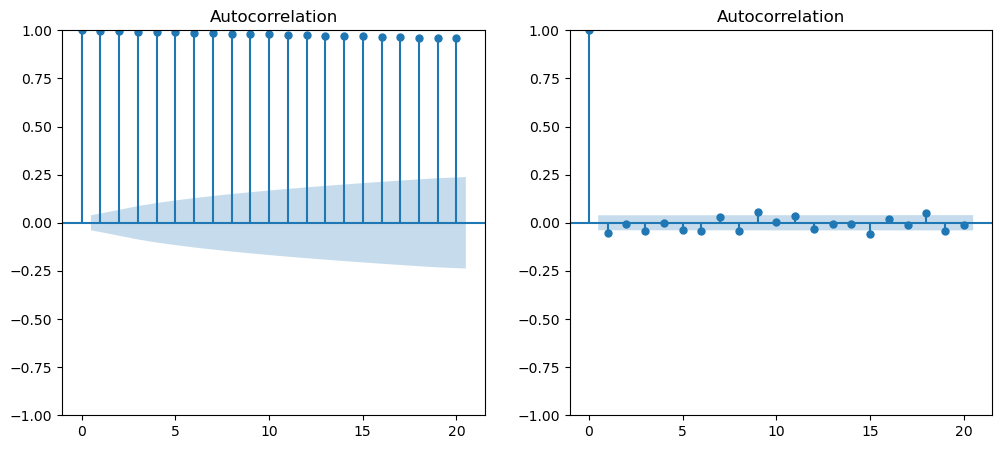

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# acf 그래프 :감소하는 것을 볼 수 있음 (비정상 시계열)
plot_acf(google_stock_df, lags=20, ax=ax[0])

#  acf 그래프 : 0에 얼마나 근접한지 차이를 볼 수 있음 (정상 시계열)
plot_acf(google_stock_diff_df, lags=20, ax=ax[1])

plt.show()

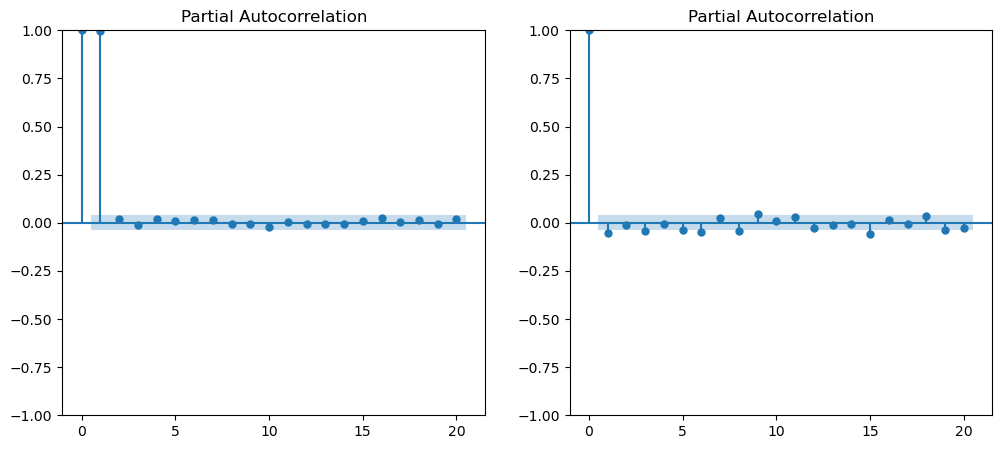

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 비정상 시계열
plot_pacf(google_stock_df, lags=20, ax=ax[0])

# 정상 시계열
plot_pacf(google_stock_diff_df, lags=20, ax=ax[1])

plt.show()